In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.6f}".format

In [147]:
master_df_scaled = pd.read_pickle("../data/processed/master_df_scaled.pkl")
master_df = pd.read_pickle("../data/processed/master_df.pkl")

In [148]:
master_df_scaled.head()

,naics1_occ1,naics1_occ2,naics1_occ3,naics2-5_occ1-5,naics1_est,naics2-3_est,naics4-5_est,naics1_ap,naics2_ap,naics3-5_ap,mean_gdp
FIPS,,,,,,,,,,,
1001,-0.086728,-0.083709,-0.090168,-0.308571,-0.112892,-0.304043,-0.293134,-0.081196,-0.169194,-0.262993,-0.167000
1003,1.720090,1.110251,1.479350,-0.137513,1.501571,0.199544,0.876563,0.335728,-0.169194,-0.157457,0.007491
1005,-0.086728,-0.083709,-0.090168,-0.308571,-0.112892,-0.304043,-0.293134,-0.081196,-0.169194,-0.262993,-0.156293
1007,-0.086728,-0.083709,-0.090168,-0.308571,-0.112892,-0.304043,-0.293134,-0.081196,-0.169194,-0.262993,-0.180788
1009,-0.086728,-0.083709,-0.090168,-0.208568,-0.112892,-0.304043,0.145502,-0.081196,-0.169194,-0.179883,-0.181004


<function matplotlib.pyplot.show(close=None, block=None)>

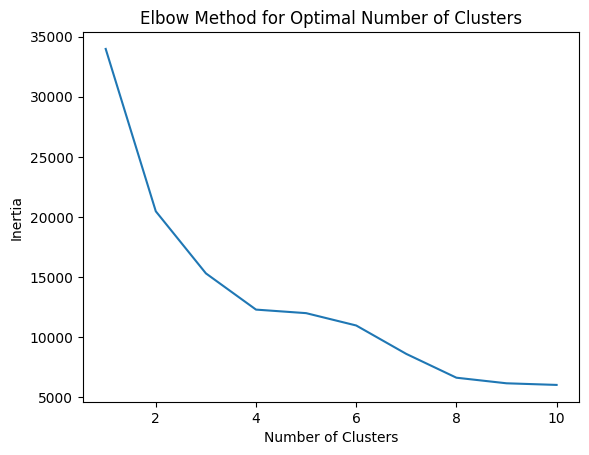

In [149]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(master_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show

In [150]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(master_df_scaled)

master_df_scaled["Cluster_ID"] = clusters
master_df["Cluster_ID"] = clusters

In [151]:
pd.to_pickle(master_df, "../data/processed/master_df_cluster.pkl")

In [152]:
sil_score = silhouette_score(master_df_scaled, clusters)
print(f"Silhoutte Score: {sil_score}")

Silhoutte Score: 0.84741989530485


<function matplotlib.pyplot.show(close=None, block=None)>

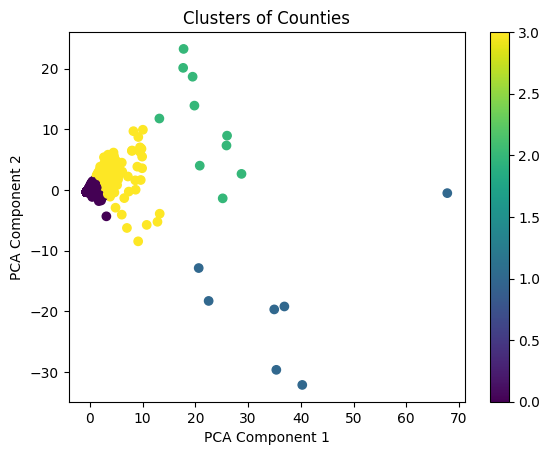

In [153]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(master_df_scaled)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Counties")
plt.colorbar()
plt.show

In [154]:
cluster_analysis = master_df.groupby("Cluster_ID").mean()
print(cluster_analysis)

            naics1_occ1  naics1_occ2  naics1_occ3  naics2-5_occ1-5  naics1_est  naics2-3_est  naics4-5_est      naics1_ap     naics2_ap   naics3-5_ap        mean_gdp
Cluster_ID                                                                                                                                                           
0              0.036700     0.073051     0.055575        46.075498    0.053827      1.058371      1.808459     440.285914   2625.094023   4500.987417   149552.192590
1            113.428571   215.714286   154.285714      1522.428571   50.714286     51.142857    101.142857 2573268.285714  73542.142857 238521.571429 15213646.285714
2             16.600000    35.600000    24.300000      3968.800000   20.000000     77.800000    125.000000  476767.000000 442542.100000 407067.900000 20836720.500000
3              2.682464     4.535545     3.909953       853.213270    2.781991     15.620853     24.900474   52703.094787  67965.781991  81040.947867  2259374.815166
